# Beginning Data Analysis Routine
This notebook contains a checklist of many of the different things you can do during exploratory data analysis.

## Develop your own Data Analysis Routine
* Use this notebook as a starting point for developing your own data analysis routine. Ideally, you will create and continually modify this document so that it contains all the ideas and steps you usually take during the beginning of an analysis.

## Have the Mindset of a Detective
* As an analyst, it is your job to extract information from data
* Go beyond the keyboard to investigate as if you are detective
* Have courage to ask the important questions
* You can also think of yourself as making a documentary about the data. You will ultimately tell some story about it. Make it accurate and interesting.


## Before Looking at Data
Once you have been given access to data, in a text document or Jupyter notebook answer the following questions:
* What process generates this data?
* Is it generated from industrial equipment, a website, internal software?
* When was it created?
* How often is it updated?
* What database(if any) is it stored in?
* Who are the admins of the database?
* Can you view the schema?
* What is the process that the raw data has gone through before it reached your hands? Has it already been pre-processed before it reaches you?
* Is there a data dictionary describing every column?
* What systems use the data?
* Have their been previous data scientists working with this dataset?
* How has data changed over time? Which columns have been added/subtracted? 
* Is data for some columns not being collected?

## Subject Matter Research
* Read articles, watch videos, talk to local subject matter experts
* Read articles/papers by academics who have already studied the field using statistical analysis
* Could be beneficial to do some analysis first as to not bias your results

## First Look at Data
* Find data dictionary
* Even if one exists, create a column to keep track of notes for each variable
* Make sure your data dictionary has the column name, data type, range of values and notes on each column
* If the data comes from a relational database, ask to see the schema
* Number of rows and columns
* Find number of missing values per column

## Is the Data Tidy?
* Data must be tidy before analysis starts.
* Most data from relational databases will be tidy
* Data from spreadsheets or scraped from the web/pdfs might not be
* Find data type of each column - continuous, categorical (ordinal or nominal), or date
* Rearrange column order in a sensible manner - categorical first, continuous last. Group common variables together.

# Univariate vs Bivariate and Graphical vs Non-Graphical

| Univariate             | Graphical                               | Non-Graphical                     | 
|-------------|-----------------------------------------|-----------------------------------|
| Categorical | Bar char of frequencies (count/percent) | Contingency table (count/percent) |
| Continuous  | Histogram/rugplot/KDE, box/violin/swarm, qqplot, fat tails  | central tendency -mean/median/mode, spread - variance, std, skew, kurt, IQR  |

| Bivariate/multivariate            | Graphical                               | Non-Graphical                     | 
|-------------|-----------------------------------------|-----------------------------------|
| Categorical vs Categorical | heat map, mosaic plot | Two-way Contingency table (count/percent) |
| Continuous vs Continuous  | all pairwise scatterplots, kde, heatmaps |  all pairwise correlation/regression   |
| Categorical vs Continuous  | [bar, violin, swarm, point, strip seaborn plots](http://seaborn.pydata.org/tutorial/categorical.html)  | Summary statistics for each level |

## Univariate Analysis
* Look at one variable at a time.
### Categorical variables
* There is less available options with categorical variables
* Count the frequency of each variable
* Low frequency strings might be outliers
* You might want to relabel low frequency strings 'other'
* Find the number of unique labels for each column
* In pandas, change the data type to categorical (better when there aren't too many unique values)
* Bar plots of counts
* String columns allow for feature engineering by splitting the string, counting certain letters, finding the length of, etc... Feature engineering can be done later when modeling
### Continuous variables
* There are a lot more options for continuous variables
* Use the five number summary - with **`.describe`**
* Boxplots are great ways to find outliers
* Use histograms and kernel density estimators to visualize the distribution.
* Know the shape of the distribution
* Think about making categorical variables out of continuous variables by cutting them into bins.

### Use bootstrapping to get more 'samples'
* Bootstrapping is done by resampling your data with replacement and gives you a 'new' random dataset
* This helps you get multiple looks at the data
* You can get estimates for the mean and variance of continuous columns this way.

### Outliers in one dimension
* Use your natural human ability to look at boxplots to find thresholds for what an outlier might be
* Generate a new column of data that is 0/1 for outlier or not. This will quickly help you find them later.

### Duplicated data
* Lots of data gets accidentally duplicated. Check for duplicates or near duplicates of rows and columns
* If any columns are calculated entirely by that of another column or columns (like with depth from the diamonds data), ensure the calculation holds. 

### Making new binary columns to label some finding
* Just like it was described above to make a 0/1 column for outliers, you can do the same for any other finding
* You can drop the duplicated rows or you can make a binary column labeling them. 
* Same for rows that do not have a correct calculation.


## Getting and knowing your DATa

**Step1.** Go to  https://drive.google.com/file/d/1n2Ga-OyA4WOPLp_IZb-emkghfoOY0qS6/view?usp=sharing

**Step2.** Download the dataset to your computer

In [1]:
import pandas as pd
import numpy as np

**Step3.** Read the data and assign it to a dataframe called data

In [2]:
engagement = pd.read_csv("Engagement.csv")

**Step4.** see the first 5 entries

In [3]:
pd.options.display.max_colwidth

50

In [4]:
pd.options.display.max_colwidth = 200

In [6]:
engagement.head(3)

,DateCreated,Status,OrganizationType,Name,ShortName,Affiliated School,Membership Type,Approximate year the organization was founded at UVA,"Please list 3-5 Primary Events/Programs that your CIO hosts each year. If you do not have annual recurring events,please list some of the events/programs you hosted this past year.",Total number of Members (approximate),...,"Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Recruiting New Members","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Delegation","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Community Building/Icebreakers","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Motivating Members","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Holding Members Accountable","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Developing a Mission/Vision","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Collaboration (with other CIOs,the community,faculty/staff,etc.)","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Other",Are you the 2020-2021 incoming President OR a 2020-2021 returning member/officer?Â,Are you a first time President?
0,4/20/20 17:37,Approved,Contracted Independent Organization,Virginia Homecomings,Homecomings,No affiliated schools,Predominantly Undergraduate Students,1995,#ERROR!,45,...,Recruiting New Members,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, I am a returning member/officer and will update the Primary Contact/President later if necessary","No, I am a returning President for this organization"
1,4/23/20 21:42,Approved,Contracted Independent Organization,Sales and Trading Group at McIntire,STGM,Commerce (McIntire),Predominantly Undergraduate Students,2010,"Presentations from faculty, professionals and students; trading simulations and education primers on asset classes.",60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, I am the incoming President.","Yes, this is my first time as President for this organization"
2,4/24/20 13:52,Approved,Contracted Independent Organization,SpongeBob Club,NaN,No affiliated schools,Predominantly Undergraduate Students,2016,"We have a recurring meeting every other week. These meetings are the foundation of our club. On the off weeks we hold Executive Board meetings. Occasionally we will host larger events, like our Zo...",50,...,Recruiting New Members,NaN,NaN,NaN,NaN,NaN,"Collaboration (with other CIOs, the community, faculty/staff, etc.)",NaN,"No, I am not, but I am the only one who makes sense to renew the organization at this time.","No, I am a returning President for this organization"


In [7]:
# give you (number of observation/rows, columns)
engagement.shape 

(653, 34)

In [8]:
#if you need just number of observation you can use
engagement.shape[0]

653

In [9]:
#to get the number of columns we can do either of the following ways
print(engagement.shape[1])

engagement.info()

34
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 34 columns):
 #   Column                                                                                                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                --------------  ----- 
 0   DateCreated                                                                                                                                                                                                                           644 non-null    object
 1   Status                                                                                                           

In [10]:
#Replace the generic data types with pandas data types
engagement.dtypes

DateCreated                                                                                                                                                                                                                             object
Status                                                                                                                                                                                                                                  object
OrganizationType                                                                                                                                                                                                                        object
Name                                                                                                                                                                                                                                    object
ShortName                                   

In [11]:
# print the name of all the columns
engagement.columns

Index(['DateCreated', 'Status', 'OrganizationType', 'Name', 'ShortName',
       'Affiliated School', 'Membership Type',
       'Approximate year the organization was founded at UVA',
       'Please list 3-5 Primary Events/Programs that your CIO hosts each year. If you do not have annual recurring events,please list some of the events/programs you hosted this past year.',
       'Total number of Members (approximate)',
       'Approximate membership dues per academic year (if zero,please write "zero")',
       'Approximately,how much money do members spend out of pocket per academic year,not including dues,for your CIO activities? (write the number,don't include $)',
       'Please list your primary sources of funding (SAF,fundraisers,national organizations,alumni,departments,etc.)',
       'Not including SAF,approximately how much money does your organization fundraise per academic year?',
       'DoesÂ this organization require an application or an interview/audition process to join?'

In [12]:
#to get the name of nth columns? n = 10
engagement.columns[9]

'Total number of Members (approximate)'

In [13]:
#what is the type of the observations of the nth columns? n = 10
engagement.dtypes['Total number of Members (approximate)']

dtype('O')

dtype('O') means (Python) objects
and other types can be

'b'       boolean

'i'       (signed) integer

'u'       unsigned integer

'f'       floating-point

'c'       complex-floating point

'O'       (Python) objects

'S', 'a'  (byte-)string

'U'       Unicode

'V'       raw data (void)

In [14]:
#we can check, how is the dataset indexted
engagement.index

RangeIndex(start=0, stop=653, step=1)

In [17]:
#to get the value of the nth observation (n=10) and the name of that observation
engagement.values[9][0]

'5/5/20 12:58'

In [18]:
## access to the value of specific column
engagement.columns

Index(['DateCreated', 'Status', 'OrganizationType', 'Name', 'ShortName',
       'Affiliated School', 'Membership Type',
       'Approximate year the organization was founded at UVA',
       'Please list 3-5 Primary Events/Programs that your CIO hosts each year. If you do not have annual recurring events,please list some of the events/programs you hosted this past year.',
       'Total number of Members (approximate)',
       'Approximate membership dues per academic year (if zero,please write "zero")',
       'Approximately,how much money do members spend out of pocket per academic year,not including dues,for your CIO activities? (write the number,don't include $)',
       'Please list your primary sources of funding (SAF,fundraisers,national organizations,alumni,departments,etc.)',
       'Not including SAF,approximately how much money does your organization fundraise per academic year?',
       'DoesÂ this organization require an application or an interview/audition process to join?'

In [19]:
engagement['Approximate year the organization was founded at UVA']

0      1995
1      2010
2      2016
3      2005
4      1922
       ... 
648     NaN
649     NaN
650     NaN
651     NaN
652     NaN
Name: Approximate year the organization was founded at UVA, Length: 653, dtype: object

In [20]:
engagement[['Name', 'ShortName',
       'Affiliated School', 'Membership Type',
       'Approximate year the organization was founded at UVA']]

,Name,ShortName,Affiliated School,Membership Type,Approximate year the organization was founded at UVA
0,Virginia Homecomings,Homecomings,No affiliated schools,Predominantly Undergraduate Students,1995
1,Sales and Trading Group at McIntire,STGM,Commerce (McIntire),Predominantly Undergraduate Students,2010
2,SpongeBob Club,NaN,No affiliated schools,Predominantly Undergraduate Students,2016
3,Omega Chi Epsilon,OXE,Engineering,Predominantly Undergraduate Students,2005
4,Alpha Chi Sigma Co-ed Professional Chemistry Fraternity,AXE,Arts and Sciences,Predominantly Undergraduate Students,1922
...,...,...,...,...,...
648,NaN,NaN,43 engineering,NaN,NaN
649,NaN,NaN,9 Curry,NaN,NaN
650,NaN,NaN,20 Commerce/Mcintire,NaN,NaN
651,NaN,NaN,7 Leadership & Public Policy,NaN,NaN


In [21]:
engagement.rename(columns=
                  {'Approximate year the organization was founded at UVA': 'year_founded_UVA',
                   'Please list 3-5 Primary Events/Programs that your CIO hosts each year. If you do not have annual recurring events,please list some of the events/programs you hosted this past year.': 'primary_events',
                   'Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Delegation': 'additional_resource'}, 
                  inplace=True)
engagement.head(3)

,DateCreated,Status,OrganizationType,Name,ShortName,Affiliated School,Membership Type,year_founded_UVA,primary_events,Total number of Members (approximate),...,"Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Recruiting New Members",additional_resource,"Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Community Building/Icebreakers","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Motivating Members","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Holding Members Accountable","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Developing a Mission/Vision","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Collaboration (with other CIOs,the community,faculty/staff,etc.)","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Other",Are you the 2020-2021 incoming President OR a 2020-2021 returning member/officer?Â,Are you a first time President?
0,4/20/20 17:37,Approved,Contracted Independent Organization,Virginia Homecomings,Homecomings,No affiliated schools,Predominantly Undergraduate Students,1995,#ERROR!,45,...,Recruiting New Members,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, I am a returning member/officer and will update the Primary Contact/President later if necessary","No, I am a returning President for this organization"
1,4/23/20 21:42,Approved,Contracted Independent Organization,Sales and Trading Group at McIntire,STGM,Commerce (McIntire),Predominantly Undergraduate Students,2010,"Presentations from faculty, professionals and students; trading simulations and education primers on asset classes.",60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, I am the incoming President.","Yes, this is my first time as President for this organization"
2,4/24/20 13:52,Approved,Contracted Independent Organization,SpongeBob Club,NaN,No affiliated schools,Predominantly Undergraduate Students,2016,"We have a recurring meeting every other week. These meetings are the foundation of our club. On the off weeks we hold Executive Board meetings. Occasionally we will host larger events, like our Zo...",50,...,Recruiting New Members,NaN,NaN,NaN,NaN,NaN,"Collaboration (with other CIOs, the community, faculty/staff, etc.)",NaN,"No, I am not, but I am the only one who makes sense to renew the organization at this time.","No, I am a returning President for this organization"


In [26]:
#engagement.isna().sum()
#engagement.isna().mean()
#engagement.isnull().mean().sort_values(ascending = False)

#The below will print first 10 Nan columns in descending order.
engagement.isnull().sum().sort_values(ascending = False).head(10)

Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Other                             640
additional_resource                                                                                                                                                                                   630
Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Developing a Mission/Vision       615
Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Transitioning Officers            614
Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Holding Members Accountable 

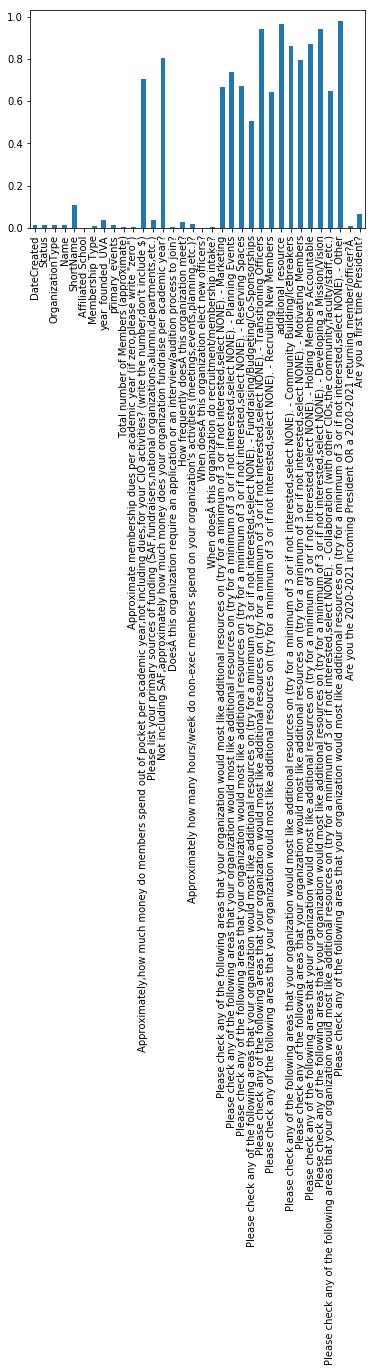

In [28]:
import matplotlib as plt
engagement.isna().mean().plot.bar()

In [30]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 32}

plt.rc('font', **font)

In [31]:
# Jupyter Notebook settings

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%autosave 0
%matplotlib inline
%load_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Autosave disabled


In [34]:
# Imports for data analysis
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 2500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 2000)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#size=25
size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)

/Users/soniabaee/Library/Python/3.7/lib/python/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


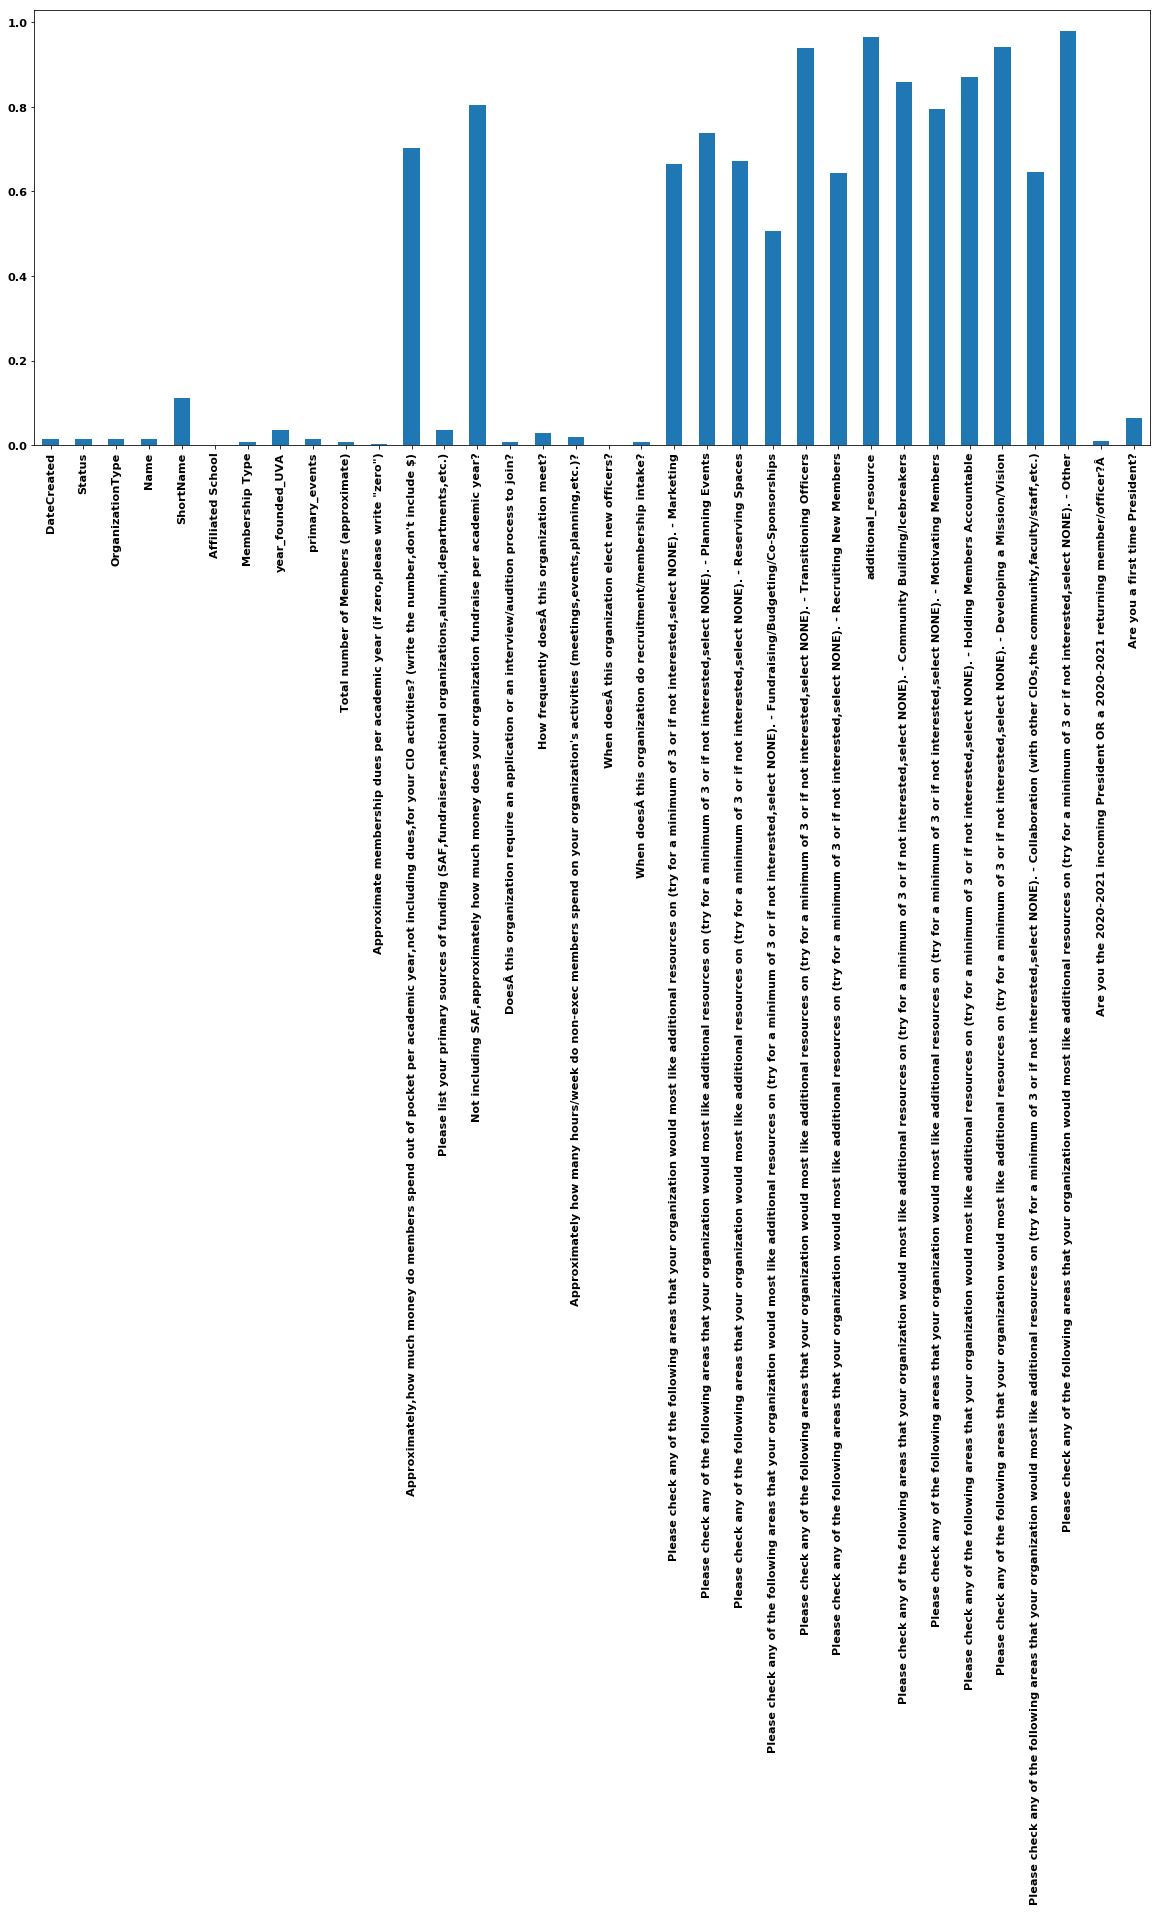

In [35]:
engagement.isna().mean().plot.bar()

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/Users/soniabaee/Library/Python/3.7/lib/python/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


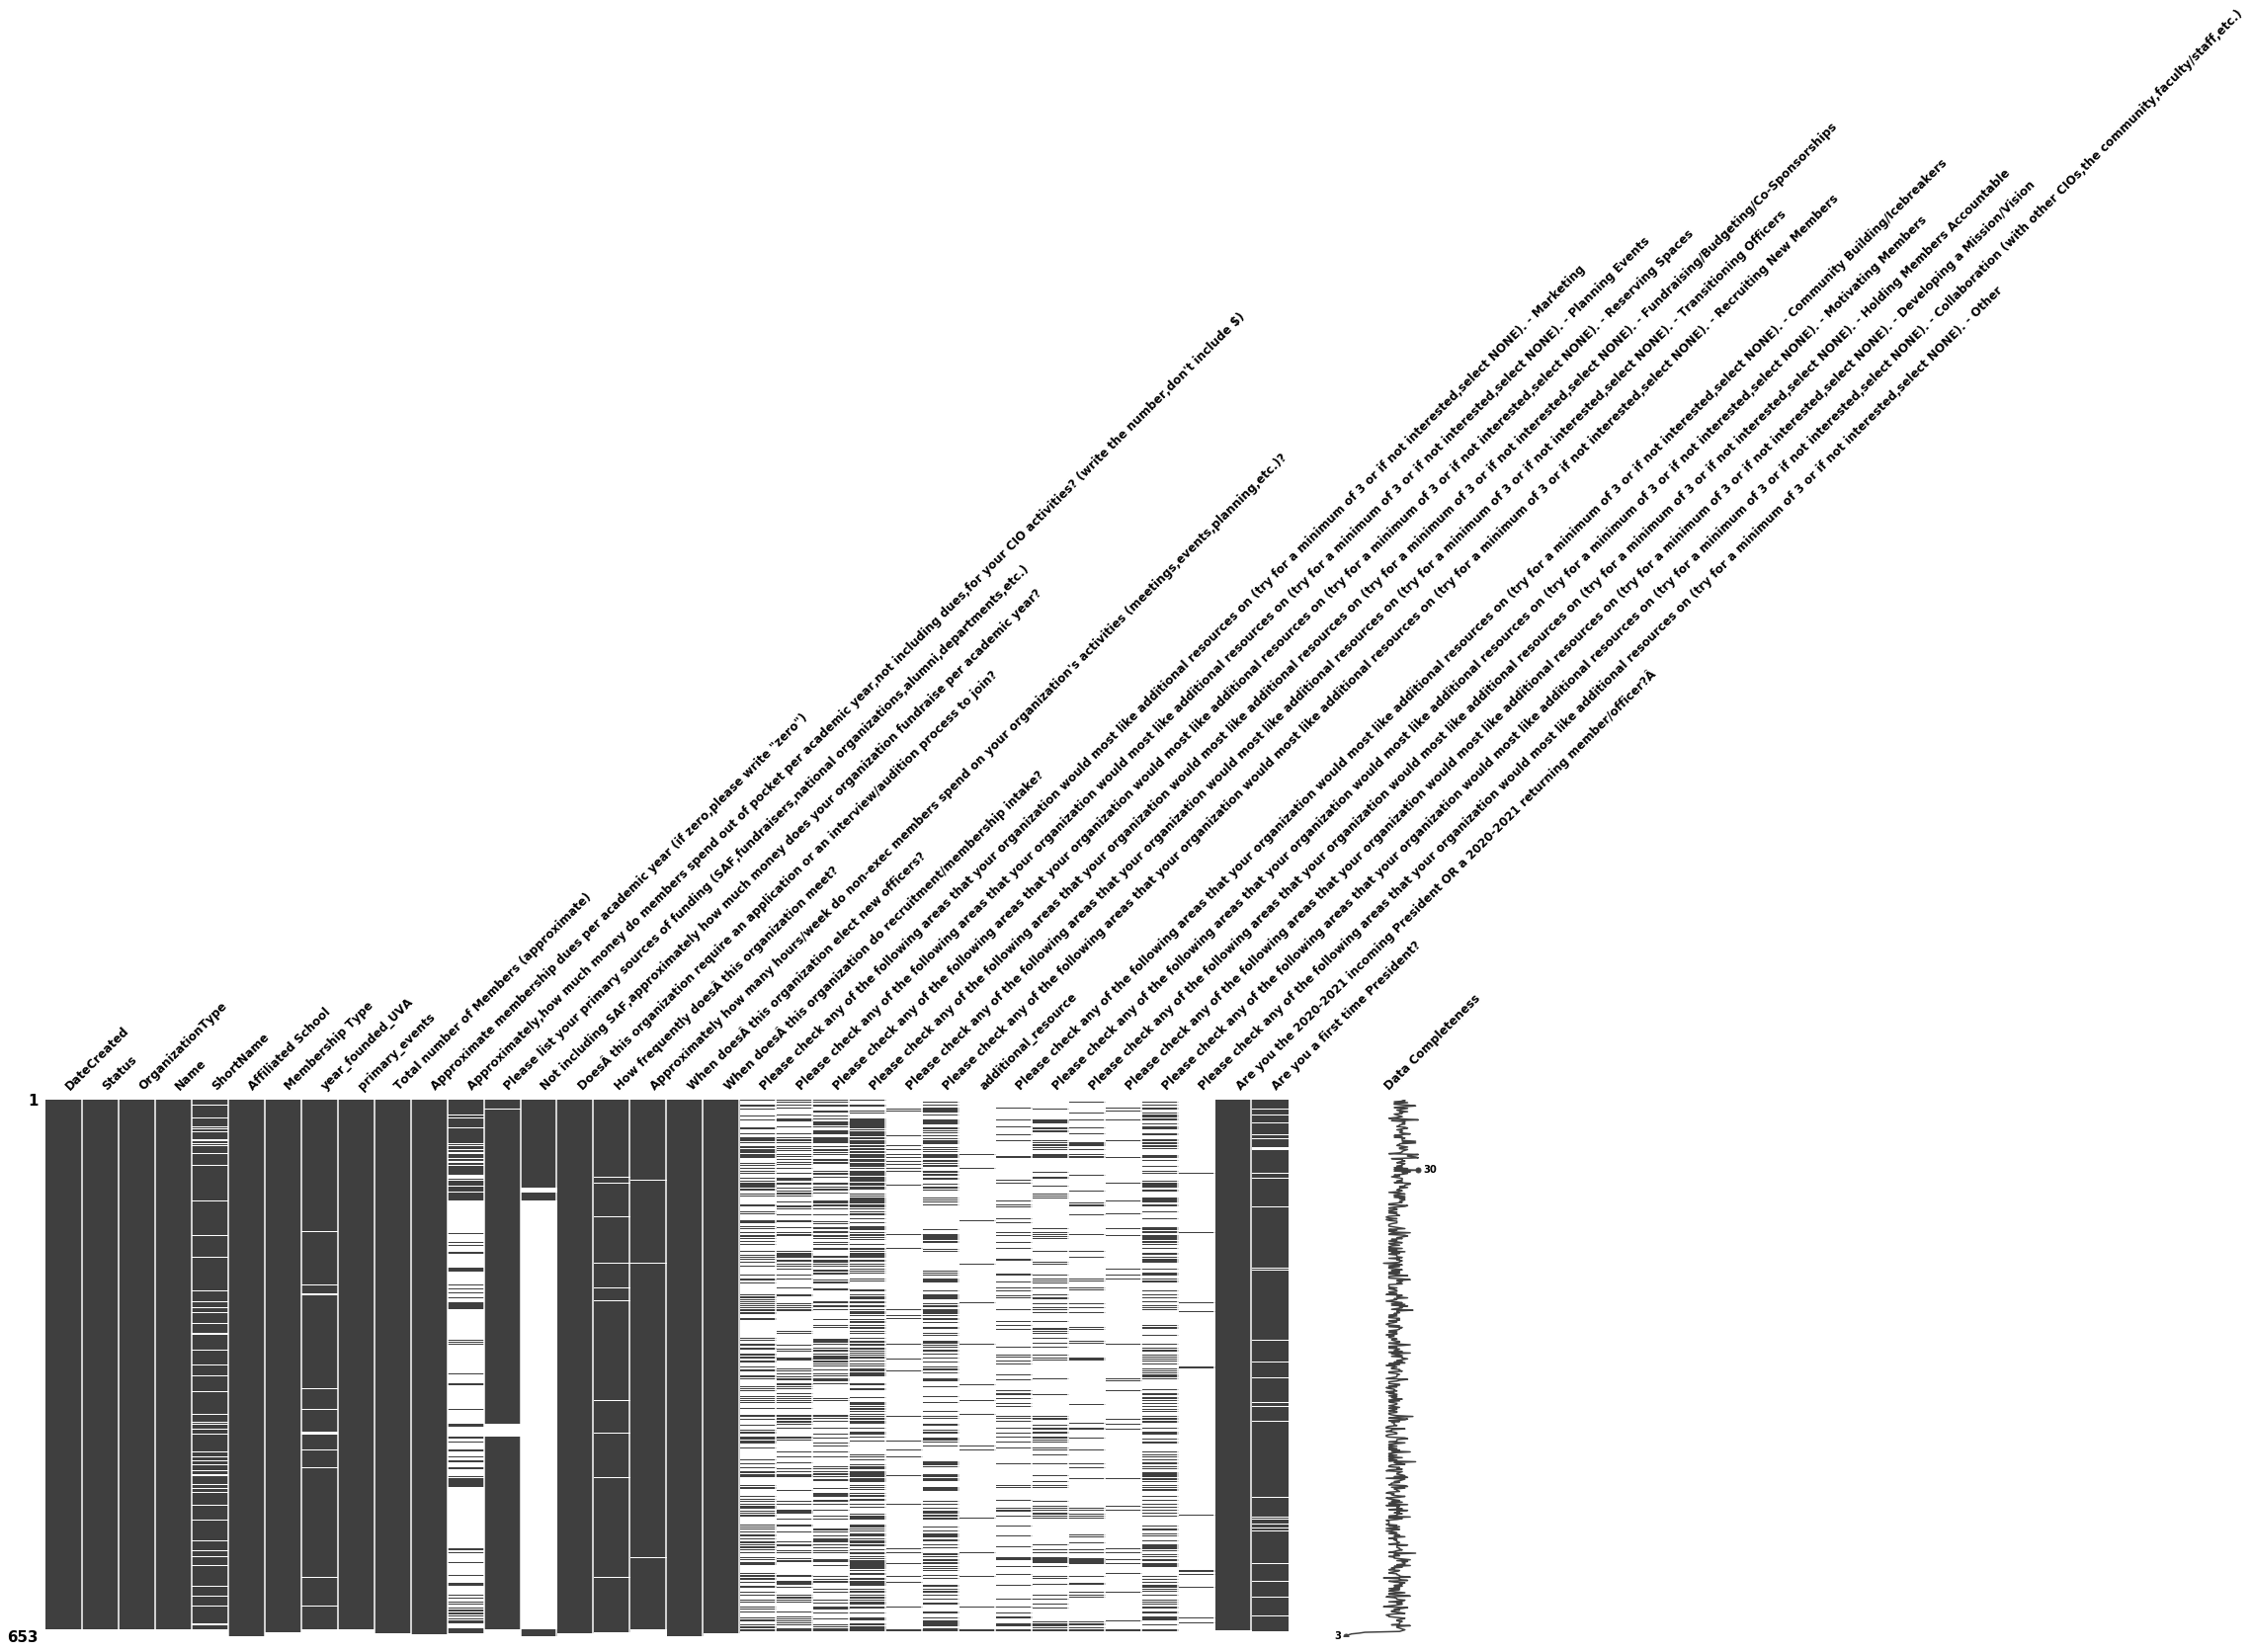

In [36]:
import missingno as msno
msno.matrix(engagement, labels = True, fontsize = 12)
#msno.bar(engagement, labels = True, fontsize = 12)

In [37]:
engagement['Membership Type'].unique()

array(['Predominantly Undergraduate Students',
       'Both Undergraduate and Graduate Students',
       'Predominantly Graduate Students', '381',
       '381 Predominantly Undergraduate Students',
       '142 Predominantly Graduate Students',
       '121 Both Undergraduate and Graduate Students', nan], dtype=object)

In [38]:
engagement['Membership Type'].value_counts()

Predominantly Undergraduate Students            381
Predominantly Graduate Students                 142
Both Undergraduate and Graduate Students        121
121 Both Undergraduate and Graduate Students      1
381                                               1
142 Predominantly Graduate Students               1
381 Predominantly Undergraduate Students          1
Name: Membership Type, dtype: int64

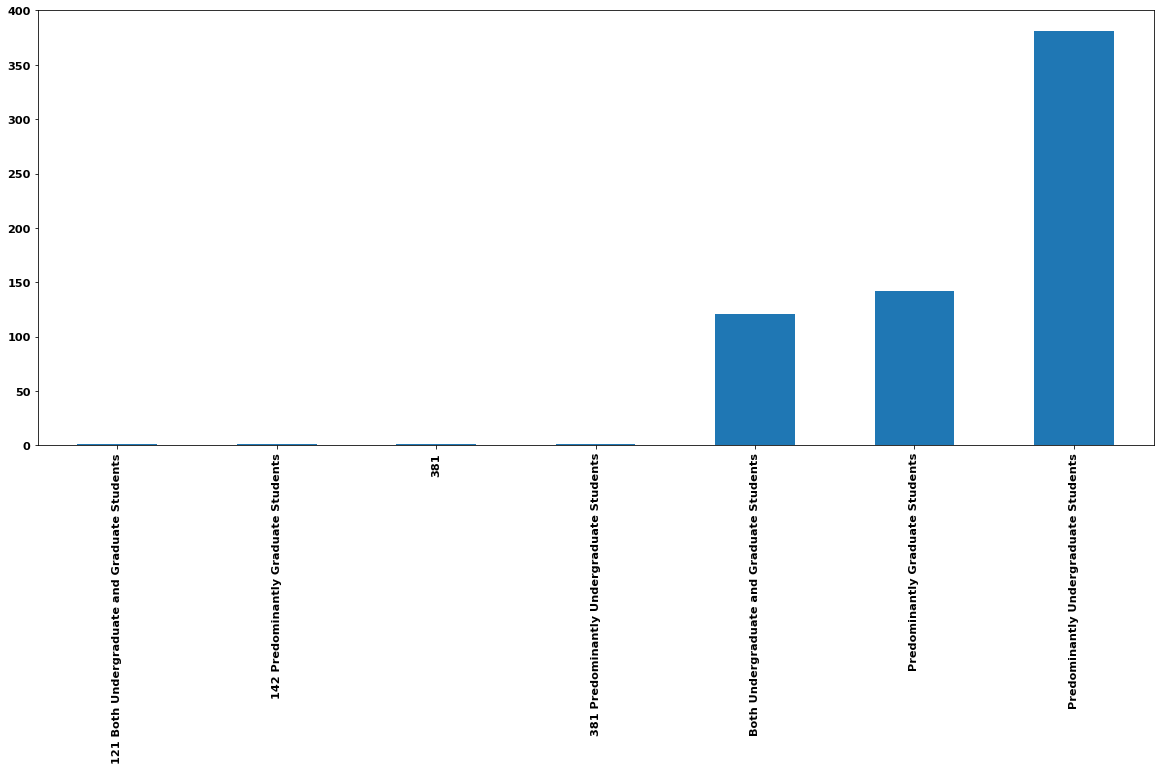

In [39]:
engagement['Membership Type'].value_counts().sort_index().plot(kind='bar')

In [42]:
pd.to_datetime(engagement.DateCreated.head())

0   2020-04-20 17:37:00
1   2020-04-23 21:42:00
2   2020-04-24 13:52:00
3   2020-04-29 21:14:00
4   2020-04-18 14:33:00
Name: DateCreated, dtype: datetime64[ns]

In [43]:
engagement.loc[:, 'pd_date'] = pd.to_datetime(engagement.DateCreated)

In [47]:
#engagement[['DateCreated','pd_date']]
max(engagement['pd_date'])

Timestamp('2020-06-01 14:36:00')

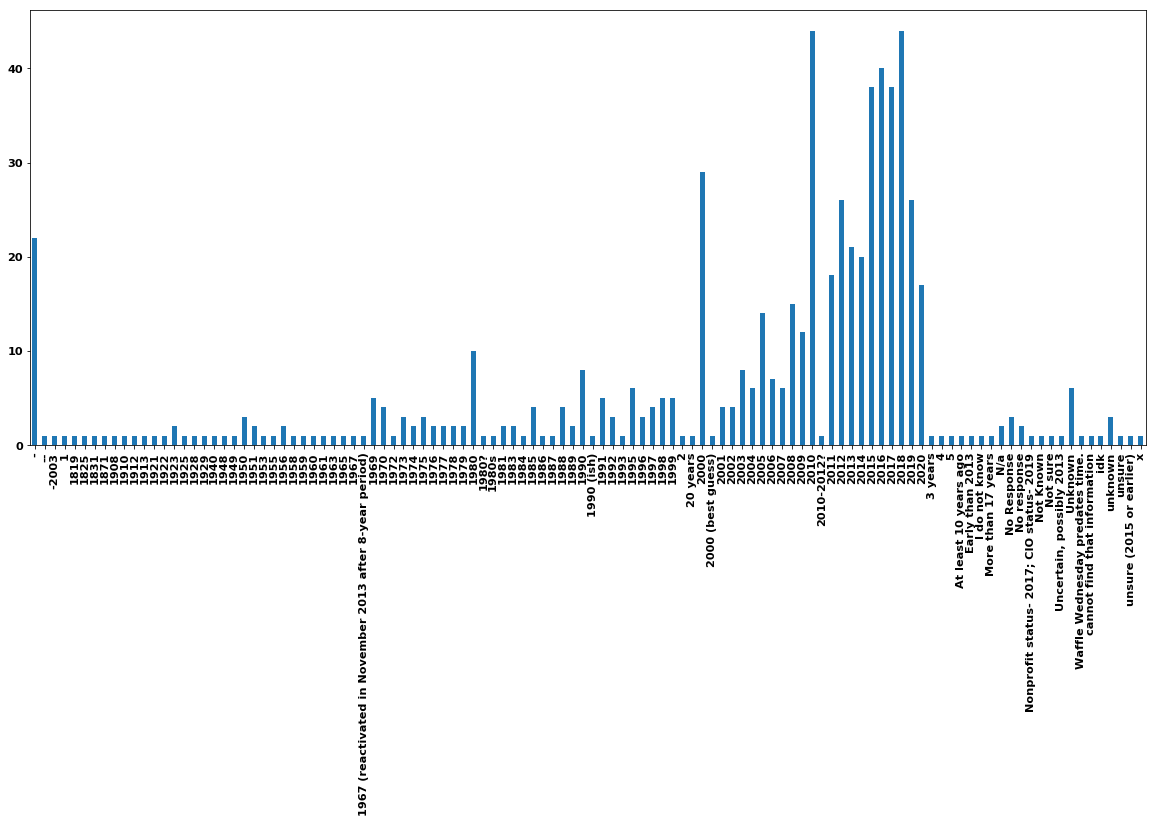

In [48]:
engagement['year_founded_UVA'].value_counts().sort_index().plot(kind = 'bar')

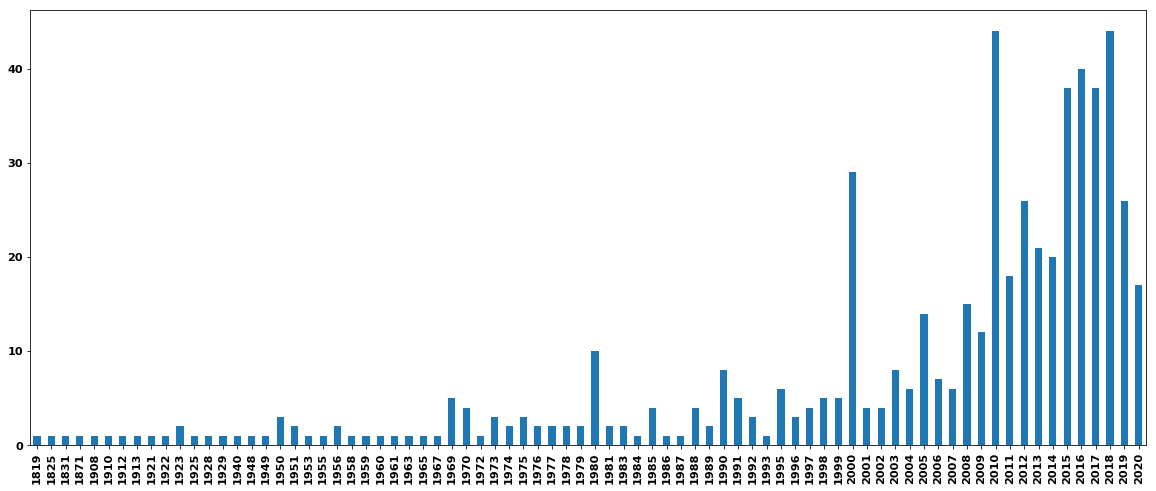

In [49]:
engagement['year_founded_UVA'][engagement['year_founded_UVA'].str.len() == 4].astype('int').value_counts().sort_index().plot(kind = 'bar')

In [50]:
#1819
engagement.loc[engagement['year_founded_UVA'] == '1819']

,DateCreated,Status,OrganizationType,Name,ShortName,Affiliated School,Membership Type,year_founded_UVA,primary_events,Total number of Members (approximate),"Approximate membership dues per academic year (if zero,please write ""zero"")","Approximately,how much money do members spend out of pocket per academic year,not including dues,for your CIO activities? (write the number,don't include $)","Please list your primary sources of funding (SAF,fundraisers,national organizations,alumni,departments,etc.)","Not including SAF,approximately how much money does your organization fundraise per academic year?",DoesÂ this organization require an application or an interview/audition process to join?,How frequently doesÂ this organization meet?,"Approximately how many hours/week do non-exec members spend on your organization's activities (meetings,events,planning,etc.)?",When doesÂ this organization elect new officers?,When doesÂ this organization do recruitment/membership intake?,"Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Marketing","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Planning Events","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Reserving Spaces","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Fundraising/Budgeting/Co-Sponsorships","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Transitioning Officers","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Recruiting New Members",additional_resource,"Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Community Building/Icebreakers","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Motivating Members","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Holding Members Accountable","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Developing a Mission/Vision","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Collaboration (with other CIOs,the community,faculty/staff,etc.)","Please check any of the following areas that your organization would most like additional resources on (try for a minimum of 3 or if not interested,select NONE). - Other",Are you the 2020-2021 incoming President OR a 2020-2021 returning member/officer?Â,Are you a first time President?,pd_date
290,4/9/20 14:48,Approved,Contracted Independent Organization,Women's Club Basketball at UVA,Women's Club Basketball,No affiliated schools,Predominantly Undergraduate Students,1819,We attend approximately 3-4 tournaments per semester. We try to host one tournament a year in our fall semester and attend regionals during our spring semester. We look to qualify for nationals each year and have consistently done so.,15-Dec,100,NaN,fundraisers,NaN,Interview/Audition,Weekly,5,January,Fall semester,NaN,NaN,Reserving Spaces,Fundraising/Budgeting/Co-Sponsorships,NaN,NaN,NaN,NaN,NaN

In [51]:
import datetime

duration = 2020 - engagement['year_founded_UVA'][engagement['year_founded_UVA'].str.len() == 4].astype('int')
duration.value_counts()

2      44
10     44
4      40
3      38
5      38
20     29
1      26
8      26
7      21
6      20
9      18
0      17
12     15
15     14
11     12
40     10
30      8
17      8
14      7
13      6
25      6
16      6
21      5
22      5
29      5
51      5
19      4
50      4
35      4
32      4
18      4
23      4
47      3
28      3
45      3
24      3
70      3
39      2
37      2
31      2
41      2
69      2
43      2
44      2
46      2
97      2
64      2
42      2
110     1
189     1
149     1
112     1
92      1
108     1
80      1
99      1
98      1
95      1
91      1
107     1
71      1
72      1
57      1
67      1
65      1
62      1
61      1
60      1
59      1
55      1
27      1
53      1
48      1
195     1
36      1
34      1
33      1
201     1
Name: year_founded_UVA, dtype: int64

In [54]:
# new_data = engagement[engagement['year_founded_UVA'].str.len() == 4]
# new_data.shape
new_data['year_founded_UVA'] = pd.to_numeric(new_data['year_founded_UVA'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
new_data.loc[:, 'duration'] = 2020 - new_data['year_founded_UVA']
new_data.duration.value_counts()

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


2      44
10     44
4      40
3      38
5      38
20     29
1      26
8      26
7      21
6      20
9      18
0      17
12     15
15     14
11     12
40     10
30      8
17      8
14      7
13      6
25      6
16      6
21      5
22      5
29      5
51      5
19      4
50      4
35      4
32      4
18      4
23      4
47      3
28      3
45      3
24      3
70      3
39      2
37      2
31      2
41      2
69      2
43      2
44      2
46      2
97      2
64      2
42      2
110     1
189     1
149     1
112     1
92      1
108     1
80      1
99      1
98      1
95      1
91      1
107     1
71      1
72      1
57      1
67      1
65      1
62      1
61      1
60      1
59      1
55      1
27      1
53      1
48      1
195     1
36      1
34      1
33      1
201     1
Name: duration, dtype: int64

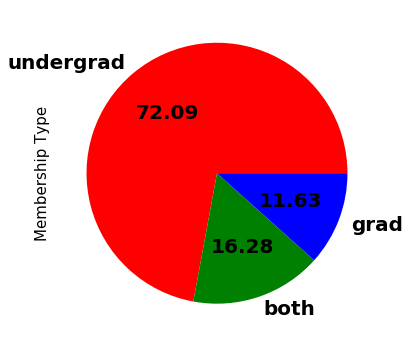

In [63]:
new_data.loc[new_data.duration < 2]['Membership Type'].value_counts().plot(kind = 'pie', 
                                                                           labels = ['undergrad', 'both', 'grad'], 
                                                                           colors=['r', 'g', 'b'],
                                                                           autopct='%.2f', 
                                                                           fontsize=20, 
                                                                           figsize=(6, 6)
                                                                         )

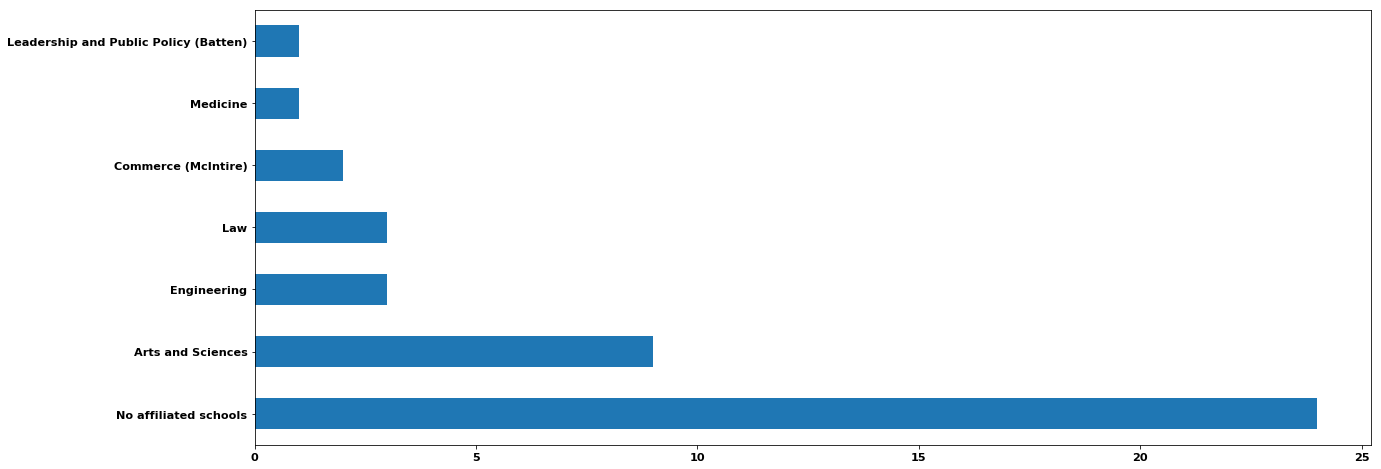

In [66]:
new_data.loc[new_data.duration < 2]['Affiliated School'].value_counts().plot.barh()